In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.info

<bound method DataFrame.info of              value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]>

In [5]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

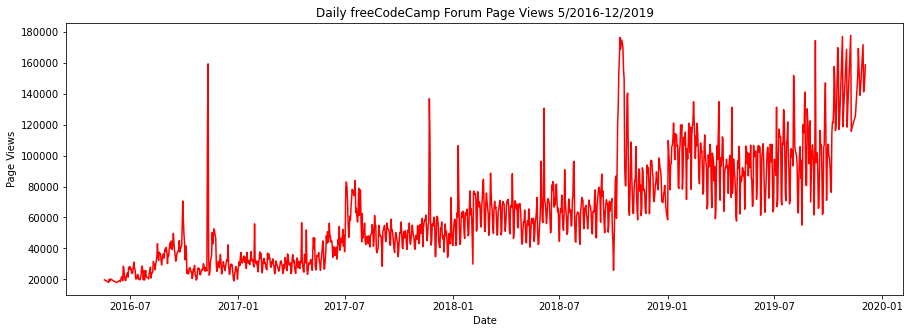

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.plot(df, color='red')

In [ ]:
df = df.reset_index()
df['Years'] = df['date'].dt.to_period('Y')
df['Months'] = df['date'].dt.strftime('%m')
df = df.set_index('date')

In [ ]:
df_bar=df.groupby(['Years','Months']).mean()

In [ ]:
df_bar=df_bar.reset_index()

In [ ]:
df_bar['Months'] = df_bar['Months'].replace({'01':'January',
                        '02':'February',
                        '03':'March',
                        '04':'April',
                        '05':'May',
                        '06':'June',
                        '07':'July',
                        '08':'August',
                        '09':'September',
                        '10':'October',
                        '11':'November',
                        '12':'December'})

In [ ]:
df_bar = df_bar.rename(columns={'value':'Average Page Views'})

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df_bar['Years'], y=df_bar['Average Page Views'], hue=df_bar['Months'], hue_order=months)

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
df_box = df_box.rename(columns={'value':'Page Views'})
df_box

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].title.set_text('Year-wise Box Plot (Trend)')
axs[1].title.set_text('Month-wise Box Plot (Seasonality)')
sns.boxplot(ax=axs[0], x=df_box['year'], y=df_box['Page Views'])
sns.boxplot(ax=axs[1], x=df_box['month'], y=df_box['Page Views'], order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axs[0].set_xlabel('Year')
axs[1].set_xlabel('Month')